<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300%EC%A0%9C_%ED%9A%8C%EA%B7%80%EC%97%B0%EC%8A%B5C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Chapter 1 - 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!

## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [1]:
# 데이터셋 준비하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 캐글 API 세팅
import os
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

In [3]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'

 98% 258M/262M [00:02<00:00, 119MB/s]
100% 262M/262M [00:02<00:00, 133MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [4]:
# csv 파일 읽기
df = pd.read_csv('vehicles.csv')

In [5]:
# EDA 및 데이터 기초 통계 분석
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [9]:
df.drop(['id', 'region_url', 'VIN', 'image_url', 'description', 'state', 'lat', 'long', 'county', 'posting_date'], axis=1, inplace=True)

In [10]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [11]:
df.drop('url', axis=1,inplace=True)

In [12]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,2.0
426876,wyoming,30590,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,1.0
426877,wyoming,34990,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,1.0
426878,wyoming,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,3.0


In [13]:
# 범주형 데이터의 통계 분석
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [14]:
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


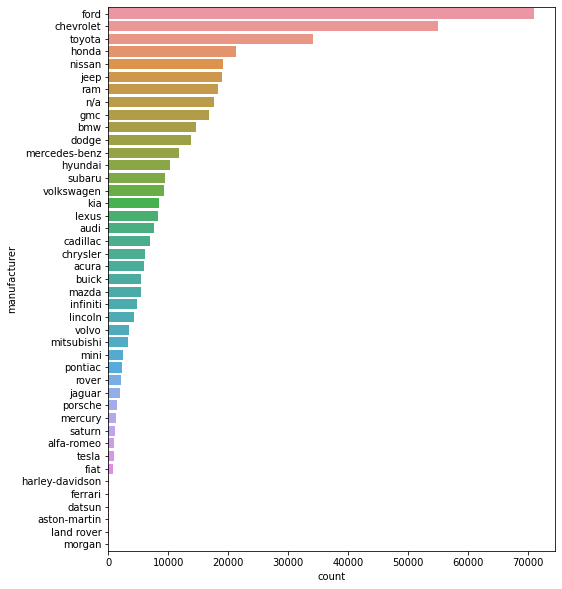

In [15]:
fig = plt.figure(figsize=(8, 10))
sns.countplot(y='manufacturer', data = df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [16]:
df.fillna('n/a')['manufacturer'].value_counts().index

Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', 'ram', 'n/a',
       'gmc', 'bmw', 'dodge', 'mercedes-benz', 'hyundai', 'subaru',
       'volkswagen', 'kia', 'lexus', 'audi', 'cadillac', 'chrysler', 'acura',
       'buick', 'mazda', 'infiniti', 'lincoln', 'volvo', 'mitsubishi', 'mini',
       'pontiac', 'rover', 'jaguar', 'porsche', 'mercury', 'saturn',
       'alfa-romeo', 'tesla', 'fiat', 'harley-davidson', 'ferrari', 'datsun',
       'aston-martin', 'land rover', 'morgan'],
      dtype='object')

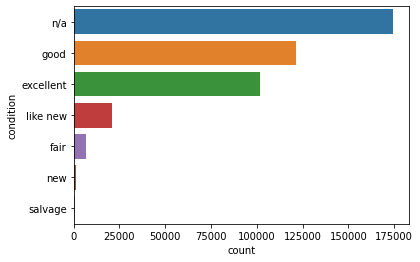

In [17]:
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

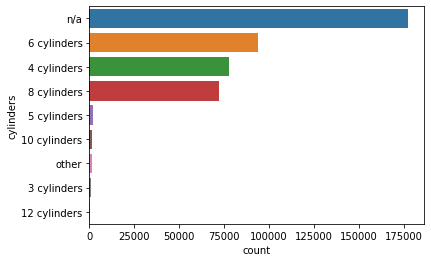

In [18]:
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

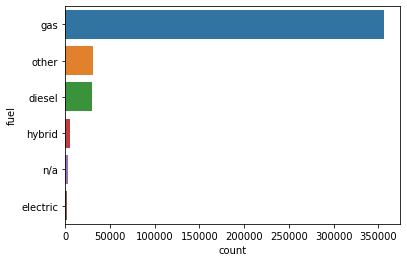

In [19]:
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

In [20]:
# 수치형 데이터의 통계 분석하기
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

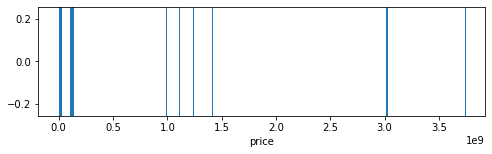

In [21]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

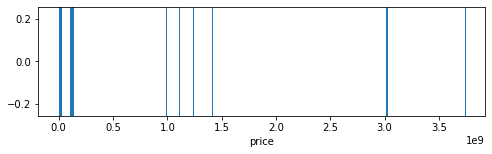

In [22]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

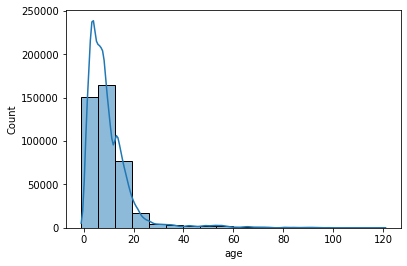

In [23]:
sns.histplot(x='age', data=df, bins=18, kde=True)

In [24]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 데이터 클리닝 수행하기
# 범주형 데이터 시각화하여 분석하기
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

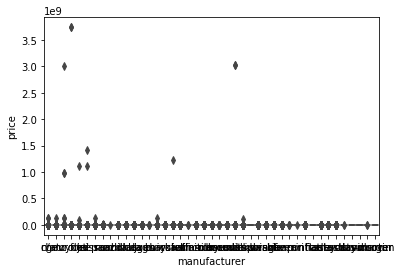

In [26]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))

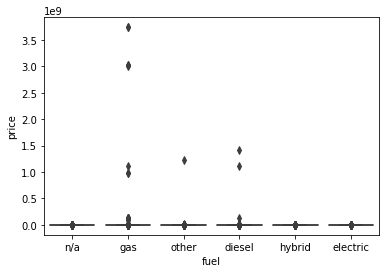

In [27]:
sns.boxplot(x='fuel', y='price', data=df.fillna('n/a'))

In [28]:
# 범주형 데이터 클리닝하기
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리한다.
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
# (4. Classifier를 학습해서, 결손 데이터를 추정하여 채워넣기)

In [29]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [30]:
df['title_status'].value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [31]:
df['title_status'].isna().sum()

8242

In [32]:
df.drop('title_status', axis=1, inplace=True)

In [33]:
df['paint_color'].fillna('others').value_counts()

others    130203
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
green       7343
custom      6700
brown       6593
yellow      2142
orange      1984
purple       687
Name: paint_color, dtype: int64

In [34]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

In [35]:
df['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

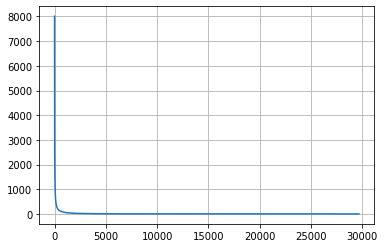

In [36]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [37]:
n_categorical = 60
others  = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [38]:
df[col].value_counts()

others                308242
f-150                   8009
silverado 1500          5140
1500                    4211
camry                   3135
silverado               3023
accord                  2969
wrangler                2848
civic                   2799
altima                  2779
escape                  2746
2500                    2687
tacoma                  2582
explorer                2499
grand cherokee          2489
corolla                 2241
mustang                 2225
fusion                  1979
equinox                 1972
cr-v                    1930
focus                   1832
malibu                  1764
tahoe                   1729
charger                 1719
corvette                1711
rav4                    1701
sonata                  1686
impala                  1682
sierra 1500             1658
grand caravan           1601
cruze                   1559
outback                 1551
silverado 2500hd        1545
f-250                   1529
elantra       

In [39]:
df.loc[df[col] == 'other', col] = 'others'

In [40]:
df[col].fillna('others', inplace=True)

In [41]:
df[col].value_counts()

others                313519
f-150                   8009
silverado 1500          5140
1500                    4211
camry                   3135
silverado               3023
accord                  2969
wrangler                2848
civic                   2799
altima                  2779
escape                  2746
2500                    2687
tacoma                  2582
explorer                2499
grand cherokee          2489
corolla                 2241
mustang                 2225
fusion                  1979
equinox                 1972
cr-v                    1930
focus                   1832
malibu                  1764
tahoe                   1729
charger                 1719
corvette                1711
rav4                    1701
sonata                  1686
impala                  1682
sierra 1500             1658
grand caravan           1601
cruze                   1559
outback                 1551
silverado 2500hd        1545
f-250                   1529
elantra       

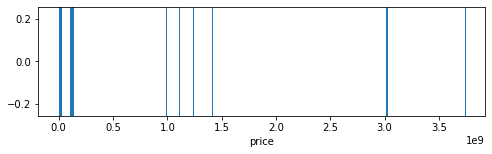

In [42]:
# 수치형 데이터 시각화하여 분석하기
# Seaborn을 이용하여 범주형 데이터를 시각화하여 분석한다
# 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot을 활용한다.
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

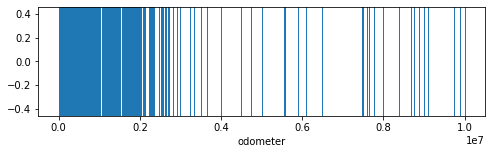

In [43]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer',data=df, height=2)

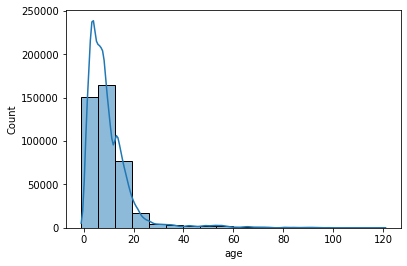

In [44]:
sns.histplot(x='age', data=df, bins=18, kde=True)

In [45]:
# 수치형 데이터 클리닝하기
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기
p1 = df['price'].quantile(0.98)
p2 = df['price'].quantile(0.1)
print(p1, p2)

56900.0 500.0


In [46]:
df =  df[(p1 > df['price']) & (df['price'] > p2)]

In [47]:
o1 = df['odometer'].quantile(0.98)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

245000.0 16156.400000000001


In [48]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [49]:
df.describe()

,price,odometer,age
count,328391.000000,328391.000000,327812.000000
mean,17220.730635,100173.986209,10.221624
std,11988.800634,54568.559769,8.452190
min,501.000000,16157.000000,-1.000000
25%,7495.000000,53201.000000,5.000000
50%,14499.000000,96760.000000,8.000000
75%,24995.000000,139687.000000,13.000000
max,56893.000000,244983.000000,121.000000


In [50]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

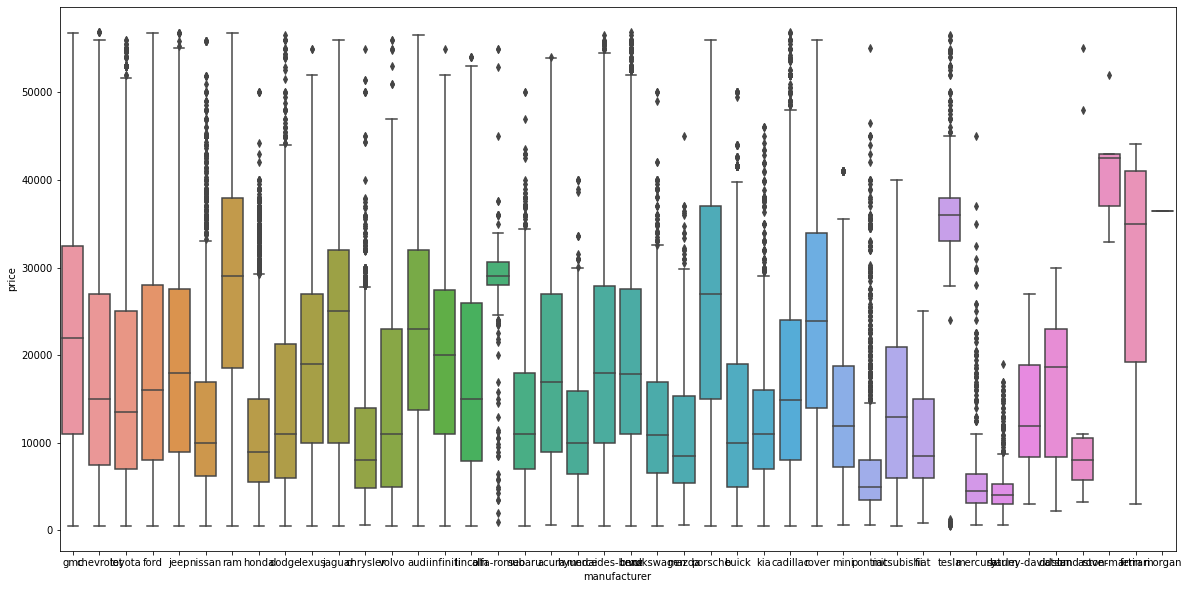

In [51]:
fig = plt.figure(figsize=(20, 10))
sns.boxplot(x='manufacturer', y='price', data=df)

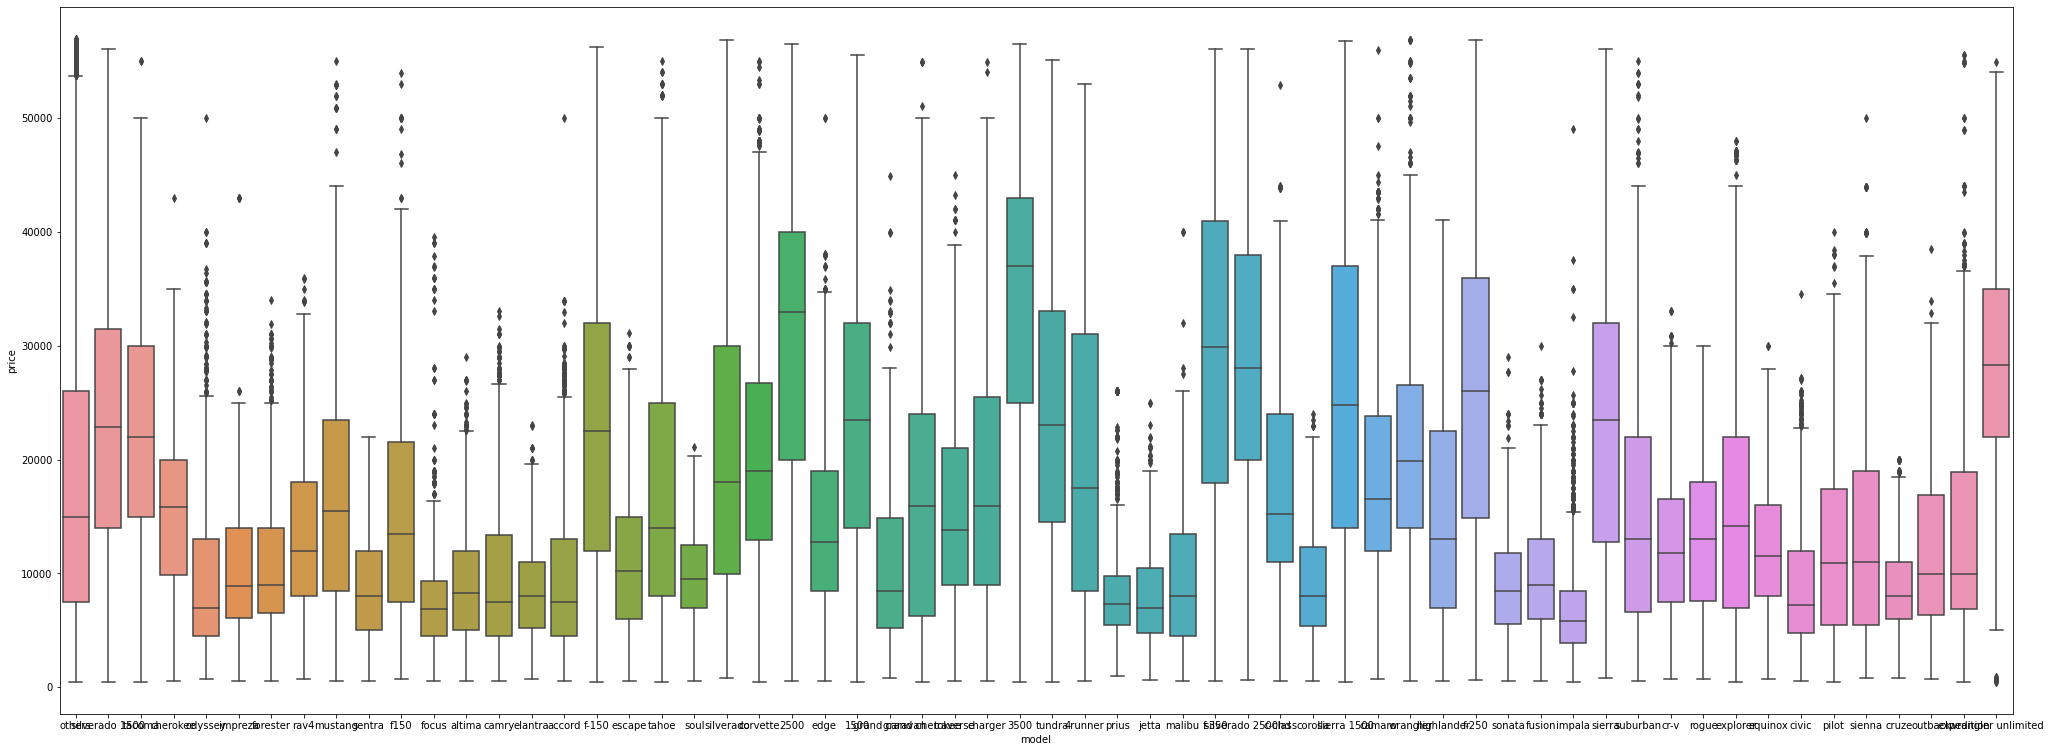

In [52]:
fig = plt.figure(figsize=(35, 13))
sns.boxplot(x='model', y='price', data=df)

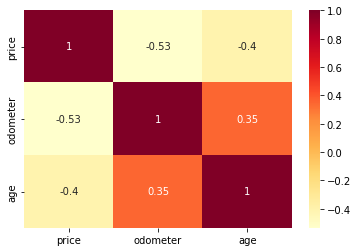

In [53]:
# 컬럼간 상관관계 Heatmap으로 시각화하기
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

In [54]:
# 모델 학습을 위한 데이터 전처리
# StandardScaler를 이용해 수치형 데이터를 표준화
from sklearn.preprocessing import StandardScaler

In [55]:
# StandardScaler를 이용해 수치형 데이터를 표준화
X_num = df[['odometer', 'age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)
X_cat = pd.get_dummies(X_cat)

# 입출력 데이터 통합
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [57]:
X.fillna(X['age'].mean())

,odometer,age,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,region_annapolis,region_appleton-oshkosh-FDL,region_asheville,region_ashtabula,region_athens,region_atlanta,region_auburn,region_augusta,region_austin,region_bakersfield,region_baltimore,region_baton rouge,region_battle creek,region_beaumont / port arthur,region_bellingham,region_bemidji,region_bend,region_billings,region_binghamton,region_birmingham,region_bismarck,region_bloomington,region_bloomington-normal,region_boise,region_boone,region_boston,region_boulder,region_bowling green,...,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
27,-0.774275,-0.381159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28,-0.530434,0.092092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
29,-1.484630,-1.091035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
30,-1.082126,-0.736097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31,0.509928,-0.262846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426872,-1.486481,-1.091035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
426874,-1.271063,-0.854410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
426875,-1.245188,-0.972723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426878,-1.283928,-0.854410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
# 학습데이터와 테스트 데이터 분리하기
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=1)

In [60]:
# Regression 모델 학습
# XGBoost Regression 모델 학습하기
from xgboost import XGBRegressor

In [61]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

[04:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [63]:
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

4234.348215110235
6171.840754924556


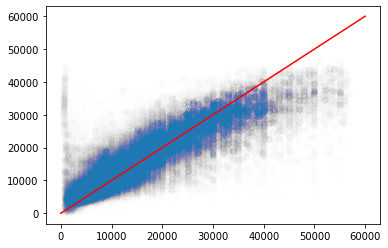

In [65]:
# 실제 값과 추측 값의 Scatter plot 시각화하기
# y_test vs. pred Scatter plot 시각적으로 분석하기
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0, 60000], [0, 60000], 'r-')

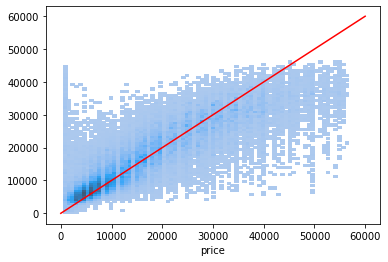

In [66]:
sns.histplot(x=y_test, y=pred)
plt.plot([0, 60000], [0, 60000], 'r-')

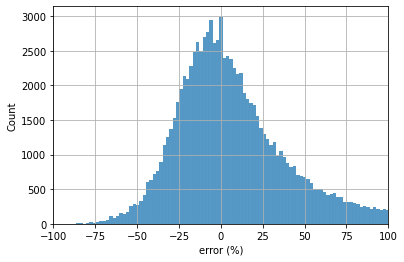

In [67]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test * 100
sns.histplot(err)
plt.xlabel('error (%)')
plt.xlim(-100, 100)
plt.grid()